In [1]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

In [2]:
#disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])

In [4]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [10]:
print(df.shape)
df  = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


df.sample(10)

In [11]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

**Preprocessing preprocess_kgptalkie**

In [12]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [14]:
import preprocess_kgptalkie as ps
import preprocess_kgptalkie.text_preprocess as tp

from preprocess_kgptalkie.text_preprocess import word_count, char_count, avg_word_len, stop_words_count, numerics_count, hashtags_count, mentions_count, upper_case_count

import pandas as pd

def get_basic_features(df):
    df["word_count"] = df["text"].apply(tp.word_count)
    df["char_count"] = df["text"].apply(tp.char_count)
    df["avg_word_length"] = df["text"].apply(tp.avg_word_len)
    df["stop_words_count"] = df["text"].apply(tp.stop_words_count)
    df["numerics_count"] = df["text"].apply(tp.numerics_count)
    df["hashtags_count"] = df["text"].apply(tp.hashtags_count)
    df["mentions_count"] = df["text"].apply(tp.mentions_count)
    df["upper_case_count"] = df["text"].apply(tp.upper_case_count)
    
    return df

# Example Usage
#df = pd.DataFrame({"text": ["Hello @user! This is a #sample text with 123 numbers.", "Another example sentence."]})
df = get_basic_features(df)

print(df)


        sentiment                                               text  \
0        Positive  im getting on borderlands and i will murder yo...   
1        Positive  I am coming to the borders and I will kill you...   
2        Positive  im getting on borderlands and i will kill you ...   
3        Positive  im coming on borderlands and i will murder you...   
4        Positive  im getting on borderlands 2 and i will murder ...   
...           ...                                                ...   
75677  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...   
75678  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
75679    Positive  Today sucked so it’s time to drink wine n play...   
75680    Positive  Bought a fraction of Microsoft today. Small wins.   
75681     Neutral  Johnson & Johnson to stop selling talc baby po...   

       word_count  char_count  avg_word_length  stop_words_count  \
0              11          43         3.909091                 6   

In [15]:
df.columns

Index(['sentiment', 'text', 'word_count', 'char_count', 'avg_word_length',
       'stop_words_count', 'numerics_count', 'hashtags_count',
       'mentions_count', 'upper_case_count'],
      dtype='object')

In [16]:
df.head()

,sentiment,text,word_count,char_count,avg_word_length,stop_words_count,numerics_count,hashtags_count,mentions_count,upper_case_count
0,Positive,im getting on borderlands and i will murder yo...,11,43,3.909091,6,0,0,0,0
1,Positive,I am coming to the borders and I will kill you...,12,40,3.333333,8,0,0,0,2
2,Positive,im getting on borderlands and i will kill you ...,10,41,4.100000,5,0,0,0,0
3,Positive,im coming on borderlands and i will murder you...,10,42,4.200000,5,0,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,12,46,3.833333,6,1,0,0,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

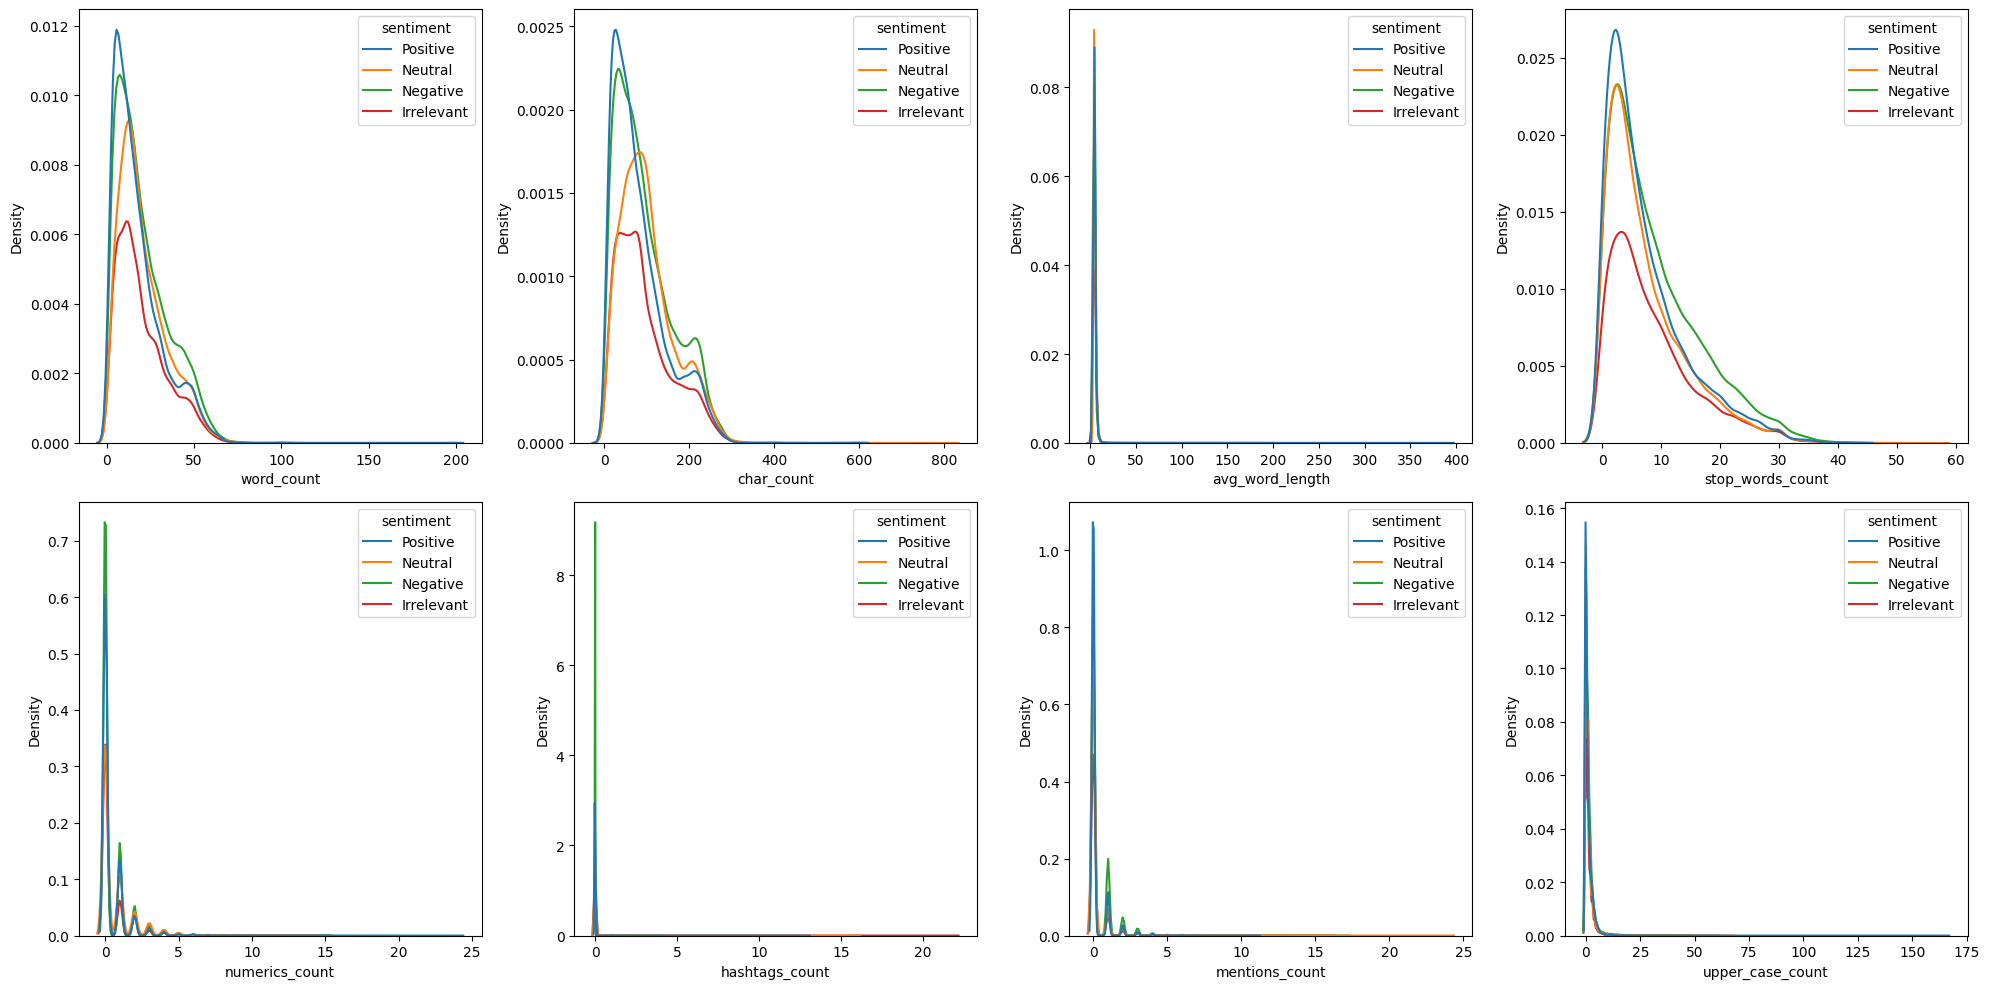

In [18]:
plt.figure(figsize=(20,10))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4,index + 1)
    sns.kdeplot(data = df, x = col, hue = "sentiment", fill = False)
    #sns.distplot(df[col], label=col, color='red')
    #sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)

plt.tight_layout()
plt.show()

In [19]:
df.select_dtypes(include='number')

,word_count,char_count,avg_word_length,stop_words_count,numerics_count,hashtags_count,mentions_count,upper_case_count
0,11,43,3.909091,6,0,0,0,0
1,12,40,3.333333,8,0,0,0,2
2,10,41,4.100000,5,0,0,0,0
3,10,42,4.200000,5,0,0,0,0
4,12,46,3.833333,6,1,0,0,0
...,...,...,...,...,...,...,...,...
75677,47,235,5.000000,21,1,0,0,1
75678,46,202,4.391304,22,1,0,0,10
75679,24,97,4.041667,10,0,0,0,1
75680,8,42,5.250000,2,0,0,0,0


<Axes: ylabel='count'>

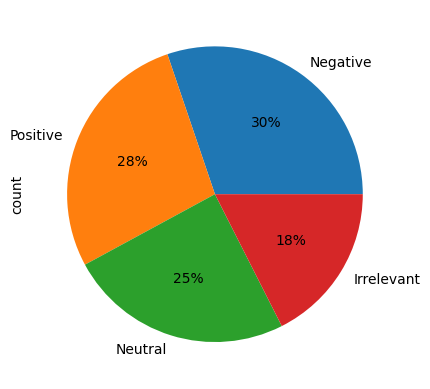

In [20]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [21]:
## Word Cloud Visulisation
##!pip install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

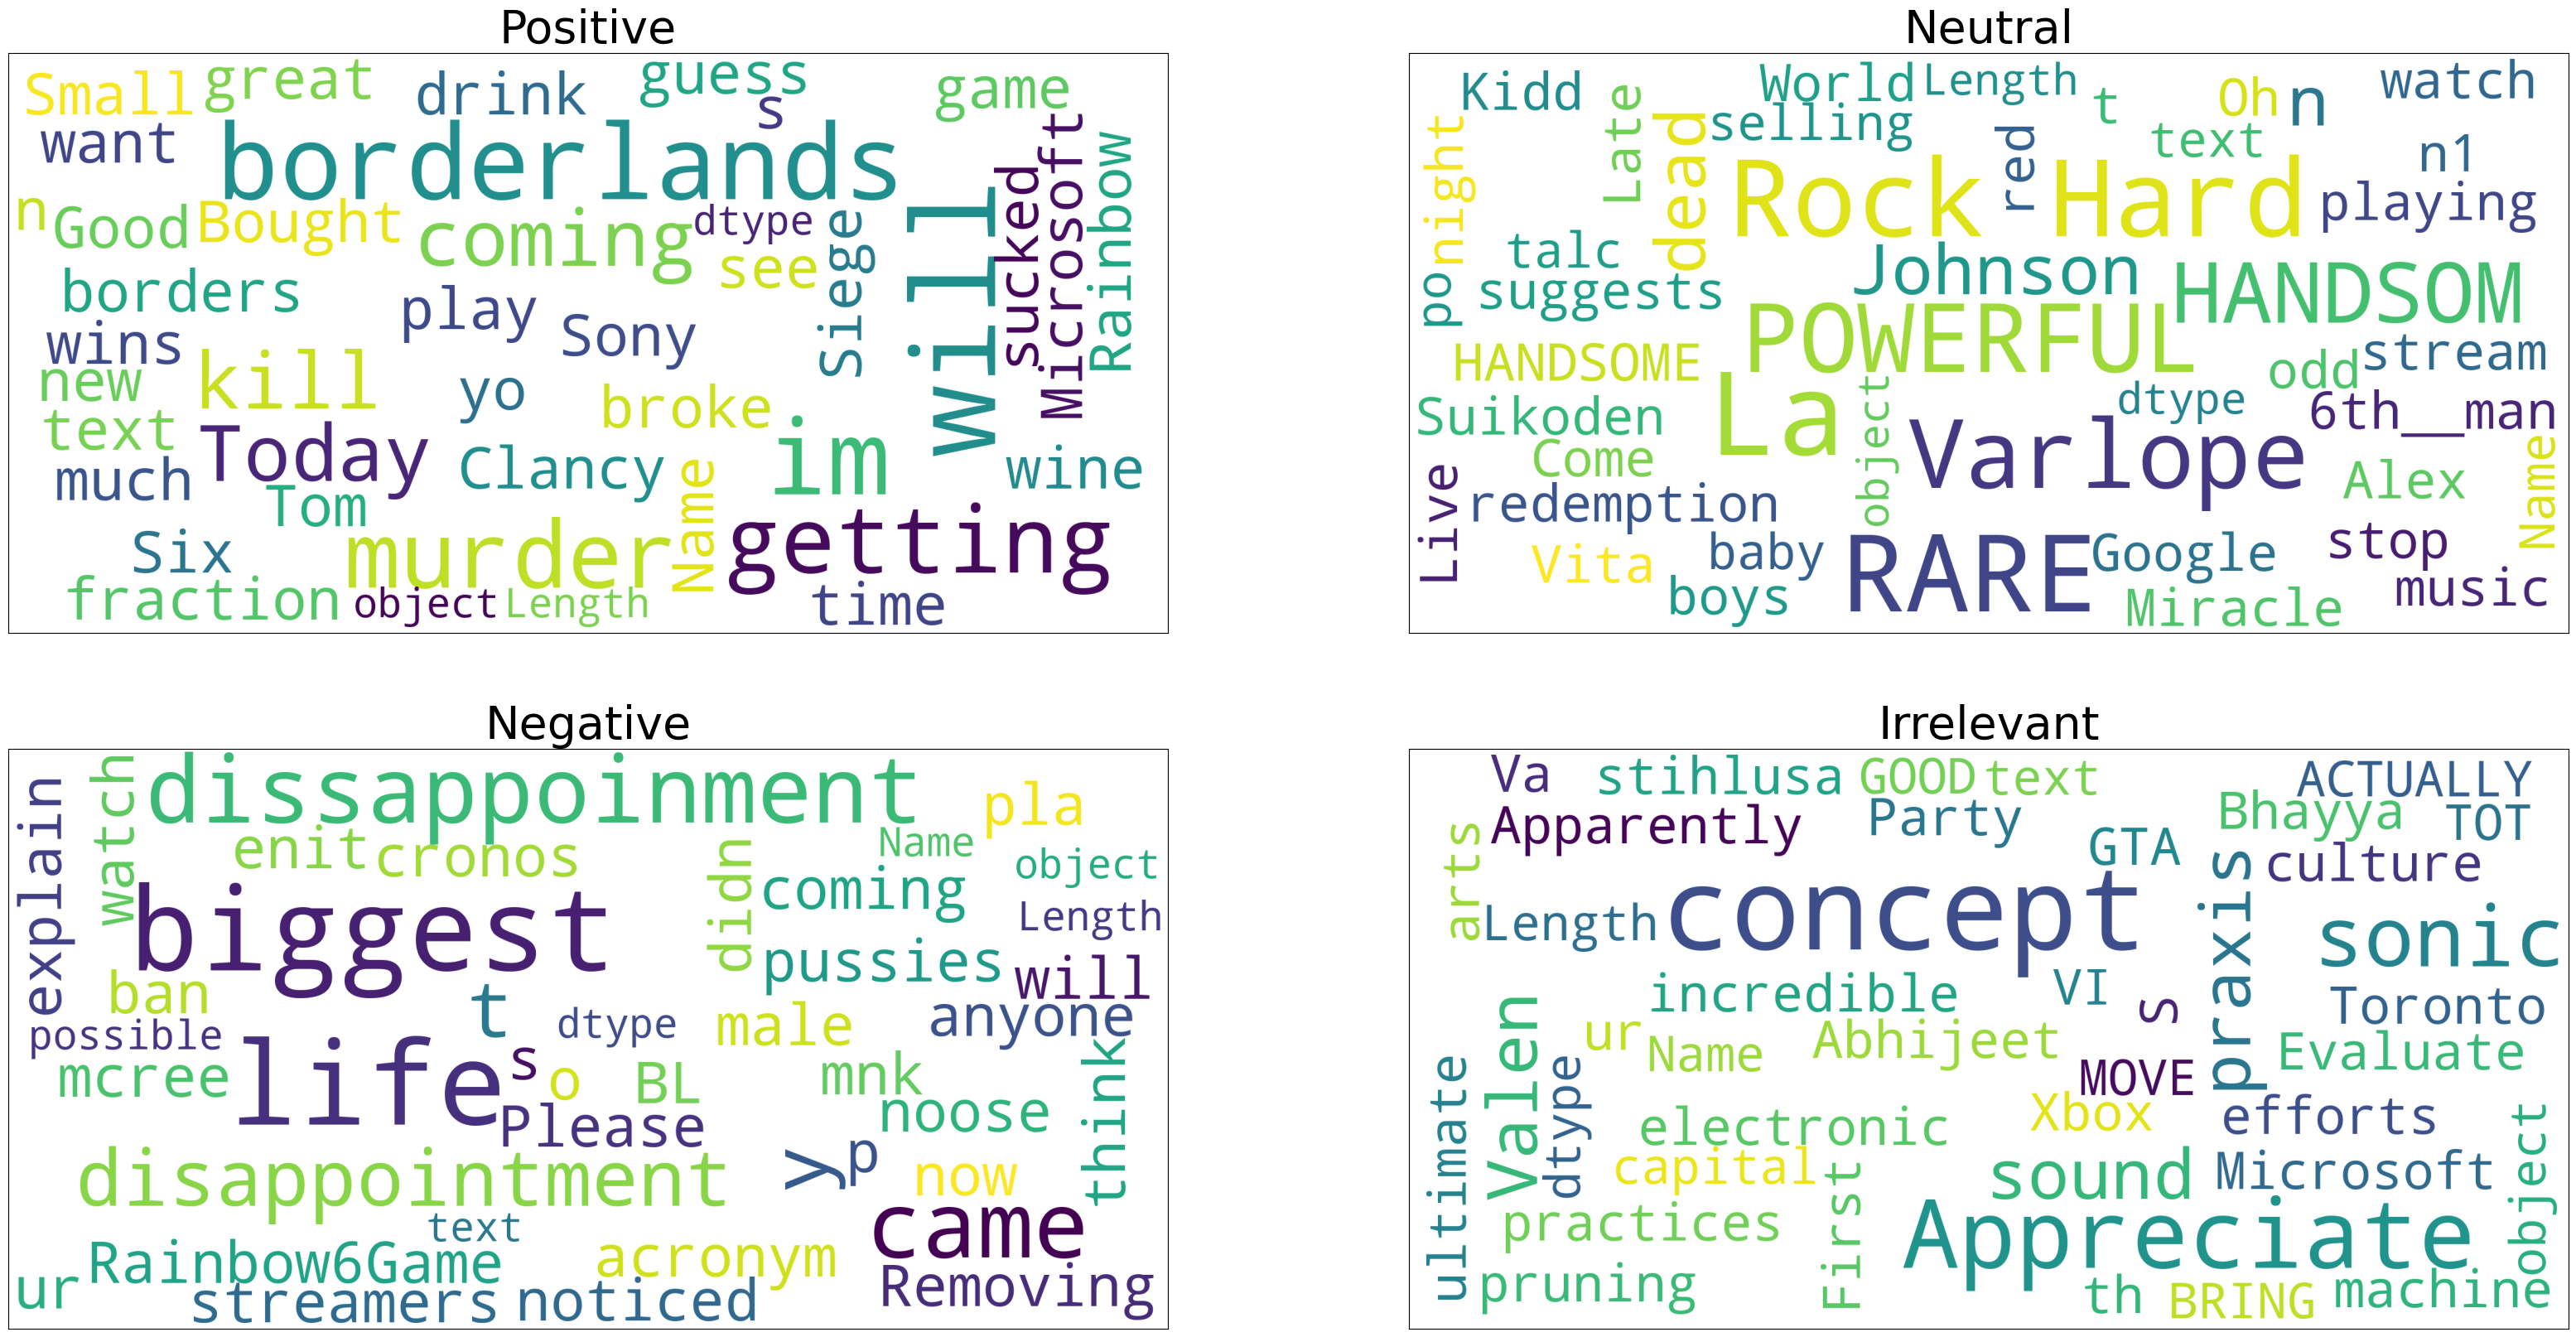

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    #print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    #fig = plt.figure(figsize=(15,15))
    #plt.axis('off')

    
    #disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()


### Data Cleaning

In [24]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [25]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=42)

In [26]:
X_train.shape, X_test.shape

((58306,), (14577,))

### Model Building and Testing

In [27]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

stopwords = list(stopwords)  # Ensure stopwords is a list
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('rfc', RandomForestClassifier(n_jobs=-1))
])


#clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),('rfc', RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=["i'd", "you'd", 'above', "hadn't",
                                             'you', 'on', "there's", 'under',
                                             'while', 'why', 'where', 'herself',
                                             'ever', "he'd", 'www', 'was',
                                             'those', 'been', 'it', 'does',
                                             'such', "he'll", "mustn't", 'own',
                                             'until', 'yours', 'she', "why's",
                                             "he's", 'and', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [28]:
# evaluation
from sklearn.metrics import accuracy_score, classification_report

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92      2502
    Negative       0.94      0.95      0.94      4436
     Neutral       0.93      0.92      0.92      3619
    Positive       0.90      0.95      0.92      4020

    accuracy                           0.93     14577
   macro avg       0.93      0.92      0.93     14577
weighted avg       0.93      0.93      0.93     14577

0.9285175276119915


In [29]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [30]:
clf.predict(['"Excited for the weekend! Time to relax and have some fun with friends. 🎉🍕 #FridayFeeling"'])

array(['Positive'], dtype=object)

In [31]:
clf.predict(['"Ugh, missed my flight because of a stupid traffic jam. What a day! 😤✈️ #frustrated"'])

array(['Negative'], dtype=object)

In [32]:
clf.predict(['"Watching the news, so much happening around the world. 🌍 #stayupdated"'])

array(['Neutral'], dtype=object)

In [34]:
clf.predict(['"If you could have any superpower, what would it be? 🦸‍♂️"'])

array(['Positive'], dtype=object)